<a href="https://colab.research.google.com/github/PranayJagtap06/ML_Projects/blob/main/hand_signs_multiclasss_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hand Signs Classification 👋 ✌ ✋
Welcome to Hand Signs classification project.

In this project I will try to classify hand signs depicting numbers from 0 to 5 using TensorFlow and CNN.
The dataset for this project I'm using is from Kaggles' [[DL.AI] Hand Signs 05 Dataset](https://www.kaggle.com/datasets/shivamaggarwal513/dlai-hand-signs-05/data).
Dataset contains images of hand signs representing numbers 0 to 5 (both inclusive) and corresponding labels (6 classes).

**Size:** Dataset has 1200 labelled samples of size 15MB. Training set has 1080 samples and test set has 120 samples.

**Image Resolution:** Images with height x width = 64 x 64 pixels and 3 channels (RGB).

## Downloading and Loading the dataset
Let's start with downloading and loading the dataset...

### Downloading the dataset
The dataset is available in zip format so we'll need to unzip it. There are two files in the .zip file, one for training data and another for test data, in HDF5 format.

This is the file hierarchy...

. train.h5 (HDF5 file)

+-- train_set_x (HDF5 dataset)

|   +-- 'numpy.ndarray' (1080, 64, 64, 3)

+-- train_set_y (HDF5 dataset)

|   +-- 'numpy.ndarray' (1080,)

+-- list_classes (HDF5 dataset)

|   +-- 'numpy.ndarray' (6,)


. test.h5 (HDF5 file)

+-- test_set_x (HDF5 dataset)

|   +-- 'numpy.ndarray' (120, 64, 64, 3)

+-- test_set_y (HDF5 dataset)

|   +-- 'numpy.ndarray' (120,)

+-- list_classes (HDF5 dataset)

|   +-- 'numpy.ndarray' (6,)


Let's unzip the file...

In [ ]:
import zipfile

# Download zip file of pizza_steak images
!wget https://github.com/PranayJagtap06/ML_Projects/archive/main.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("main.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2024-04-27 19:31:49--  https://github.com/PranayJagtap06/ML_Projects/archive/main.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/PranayJagtap06/ML_Projects/zip/refs/heads/main [following]
--2024-04-27 19:31:49--  https://codeload.github.com/PranayJagtap06/ML_Projects/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.113.9
Connecting to codeload.github.com (codeload.github.com)|140.82.113.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip.1’

main.zip.1              [       <=>          ]  44.16M  16.2MB/s    in 2.7s    

2024-04-27 19:31:52 (16.2 MB/s) - ‘main.zip.1’ saved [46300537]



In [ ]:
# Unzip dataset file
zip_ref = zipfile.ZipFile("/content/ML_Projects-main/Hand_Signs_Classification/archive.zip", "r")
zip_ref.extractall()
zip_ref.close()

Now let's load the training and test set...

Before that let's import necessary libraries...

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import h5py
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'colab'
pio.templates.default = 'seaborn'

In [ ]:
# Loading train and test dataset
with h5py.File('train.h5', 'r') as f:
    data_Xtrain = f['train_set_x'][:]
    data_ytrain = f['train_set_y'][:]
    classes_train = f['list_classes'][:]

with h5py.File('test.h5', 'r') as f:
    data_Xtest = f['test_set_x'][:]
    data_ytest = f['test_set_y'][:]
    classes_test = f['list_classes'][:]

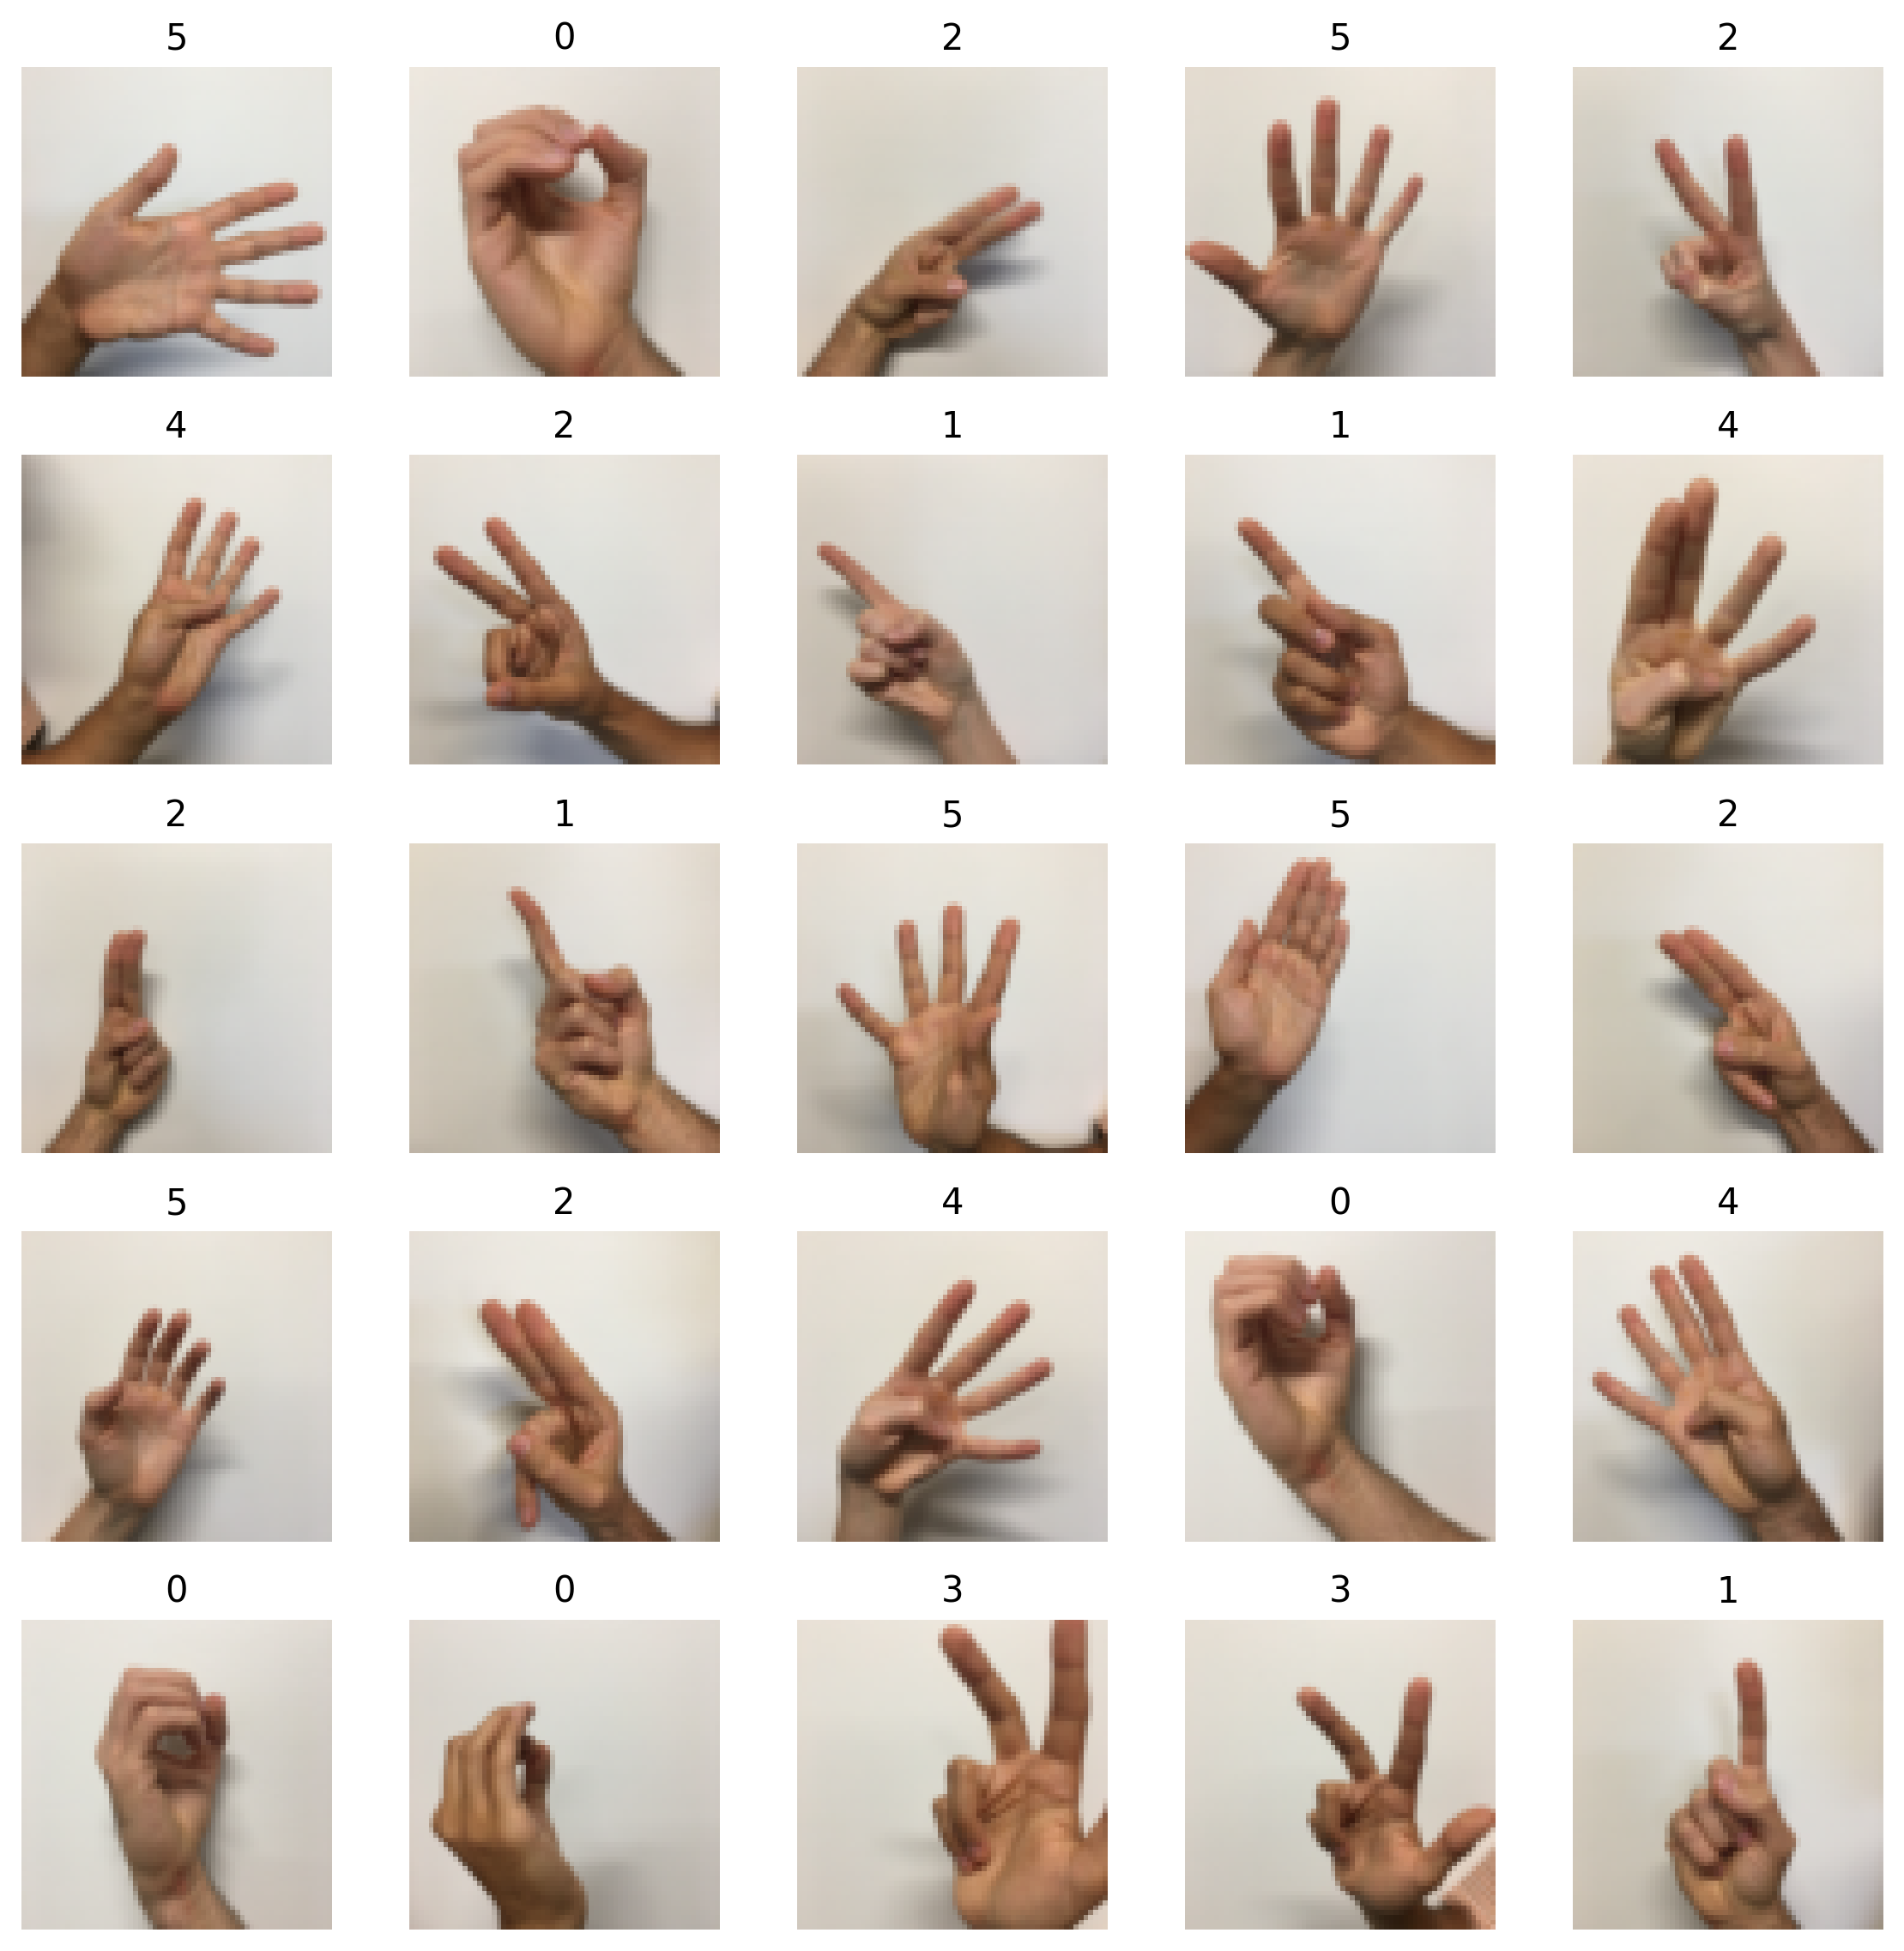

In [ ]:
# Take a look at the dataset
plt.figure(figsize=(920/100, 920/100), dpi=250)
for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(data_Xtrain[i])
    plt.title(f'{data_ytrain[i]}')
    plt.axis('off')

plt.tight_layout()
plt.savefig('data_lookup.png', dpi=250);

## Preprocessing and Creating Validation & Test Set
🔑 Note: As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255.

### Preprocessing

In [ ]:
# Get all pixel values between 0 & 1
data_Xtrain = np.round(data_Xtrain/255.0, 3)
data_Xtest = np.round(data_Xtest/255.0, 3)

### Splitting test dataset

In [ ]:
# creating validation and test set
X_val, X_test, y_val, y_test = train_test_split(data_Xtest, data_ytest, test_size=0.5, random_state=42)

## Building CNN Model

Since we're using the Adam optimizer, we need to find the optimal learning rate for our model. To do this, we'll first train the model to determine the ideal learning rate...

### Finding Ideal Learning Rate

In [ ]:
# Building model1
tf.random.set_seed(42)

model1 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(64,64,3), batch_size=32),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='softmax')
], name='model1')

# Compiling model1
model1.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Setting learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/25))

# Fitting model1
history1 = model1.fit(data_Xtrain, data_ytrain, epochs=50, validation_data=(X_val, y_val), callbacks=[lr_scheduler])

Epoch 1/50
34/34 [==============================] - 4s 84ms/step - loss: 1.7932 - accuracy: 0.1806 - val_loss: 1.7707 - val_accuracy: 0.2667 - lr: 0.0010
Epoch 2/50
34/34 [==============================] - 2s 56ms/step - loss: 1.6913 - accuracy: 0.3361 - val_loss: 1.5545 - val_accuracy: 0.6000 - lr: 0.0011
Epoch 3/50
34/34 [==============================] - 2s 56ms/step - loss: 1.3581 - accuracy: 0.5352 - val_loss: 1.2552 - val_accuracy: 0.5500 - lr: 0.0012
Epoch 4/50
34/34 [==============================] - 2s 54ms/step - loss: 1.0504 - accuracy: 0.6509 - val_loss: 1.0560 - val_accuracy: 0.6667 - lr: 0.0013
Epoch 5/50
34/34 [==============================] - 2s 54ms/step - loss: 0.8572 - accuracy: 0.7148 - val_loss: 0.8309 - val_accuracy: 0.7833 - lr: 0.0014
Epoch 6/50
34/34 [==============================] - 2s 64ms/step - loss: 0.7316 - accuracy: 0.7583 - val_loss: 0.8718 - val_accuracy: 0.7167 - lr: 0.0016
Epoch 7/50
34/34 [==============================] - 3s 77ms/step - loss: 0.6

Let's plot learning rate vs loss graph...

In [ ]:
# Plotting learning rate vs loss plot
lrs = 1e-3 * (10**(np.arange(50)/25))
fig = px.line(x=lrs, y=[history1.history['loss'], history1.history['val_loss']], title='Learning Rate vs Loss')
fig.data[0].name = 'training loss'
fig.data[1].name = 'validation loss'
fig.data[1].line.dash = 'dash'
fig.update_xaxes(title_text='Learning Rate', tickangle=-45)
fig.update_yaxes(title_text='Losses')
fig.update_layout(legend_title_text='Legend')
fig.update_layout(xaxis_type='log')

Based on the "Learning Rate vs Loss" plot, it appears that the ideal learning rate should be around 0.002 or slightly lower. At this learning rate, the training loss has stabilized at a relatively low value, and the validation loss also appears to be reasonably low, indicating that the model is not overfitting or underfitting significantly.

A few observations from the plot:

 - At very high learning rates (around 1.0 or higher), both the training and validation losses are extremely high, indicating that the model is not learning effectively.

 - At lower learning rates (around 0.001 or lower), the training loss continues to decrease, but the validation loss starts to increase, suggesting that the model is overfitting to the training data.

 - Around the learning rate of 0.002, there is a good balance between minimizing the training loss and keeping the validation loss reasonably low, which is generally desirable for a well-performing model.

However, it's important to note that the ideal learning rate can vary depending on the specific problem, model architecture, and hyperparameters used. Additionally, other factors like regularization techniques, batch size, and optimization algorithms can also influence the choice of the learning rate. Therefore, while this plot provides a good starting point, further fine-tuning and experimentation may be necessary to find the optimal learning rate for your particular use case.

Training the model on learning rate of 0.001...

### Training Model on Ideal Learning Rate

In [ ]:
# Building model2
tf.random.set_seed(42)

model2 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(64,64,3), batch_size=32),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='softmax')
], name='model2')

# Compiling model2
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Fitting model2
history2 = model2.fit(data_Xtrain, data_ytrain, epochs=18, validation_data=(X_val, y_val))

Epoch 1/18
34/34 [==============================] - 3s 63ms/step - loss: 1.7606 - accuracy: 0.2528 - val_loss: 1.6621 - val_accuracy: 0.3167
Epoch 2/18
34/34 [==============================] - 2s 58ms/step - loss: 1.4522 - accuracy: 0.4991 - val_loss: 1.3512 - val_accuracy: 0.5000
Epoch 3/18
34/34 [==============================] - 3s 79ms/step - loss: 1.0755 - accuracy: 0.6352 - val_loss: 0.9307 - val_accuracy: 0.6500
Epoch 4/18
34/34 [==============================] - 2s 63ms/step - loss: 0.8261 - accuracy: 0.7176 - val_loss: 0.8833 - val_accuracy: 0.7000
Epoch 5/18
34/34 [==============================] - 2s 52ms/step - loss: 0.6717 - accuracy: 0.7806 - val_loss: 0.7675 - val_accuracy: 0.7500
Epoch 6/18
34/34 [==============================] - 2s 53ms/step - loss: 0.5379 - accuracy: 0.8352 - val_loss: 0.8213 - val_accuracy: 0.7167
Epoch 7/18
34/34 [==============================] - 2s 53ms/step - loss: 0.4609 - accuracy: 0.8556 - val_loss: 0.6592 - val_accuracy: 0.7500
Epoch 8/18
34

Wow! Our model performs pretty good.
Let's have a look at `model2` architecture...

In [3]:
# model2 architecture
model2.summary()

Model: "model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (32, 62, 62, 10)          280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (32, 31, 31, 10)          0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (32, 29, 29, 10)          910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (32, 14, 14, 10)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (32, 1960)                0         
                                                                 
 dense_1 (Dense)             (32, 6)                   11766


Let's plot loss and accuracy curves...

In [ ]:
# Loss Curve
fig1 = px.line(x=np.arange(1, 19), y=[history2.history['loss'], history2.history['val_loss']], title='Losses')
fig1.data[0].name = 'training loss'
fig1.data[1].name = 'validation loss'
fig1.data[1].line.dash = 'dash'
fig1.update_xaxes(title_text='Epoch', tickangle=-45)
fig1.update_yaxes(title_text='Losses')
fig1.update_layout(legend_title_text='Legend')
# fig.update_layout(xaxis_type='log')

Based on the plot of training and validation losses over epochs, the model appears to be performing reasonably well without significant overfitting issues.
Here are my observations:

 - Both the training loss (blue line) and validation loss (orange line) decrease steadily over the epochs, indicating that the model is learning and generalizing effectively from the training data.
 - The training loss decreases at a faster rate initially compared to the validation loss, which is expected as the model first fits the training data before generalizing to the unseen validation data.
 - Importantly, the gap between the training and validation losses does not diverge significantly as training progresses. This suggests that the model is not overfitting to the training data, as both losses continue to decrease in tandem.
 - Towards the later epochs (around epoch 14-18), both the training and validation losses appear to plateau, indicating that the model has likely converged and further training may not yield substantial improvements.

Overall, the model's performance seems satisfactory based on this plot. The decreasing and converging behavior of both the training and validation losses, without a large gap between them, suggests that the model is learning the underlying patterns in the data well and generalizing to unseen examples reasonably.

Of course, it's important to also evaluate the model's performance on other metrics relevant to the specific task or application, but from the perspective of the loss curves, there are no glaring issues of overfitting or underfitting that need to be addressed urgently.

In [ ]:
# Accuracy Curve
fig2 = px.line(x=np.arange(1, 19), y=[history2.history['accuracy'], history2.history['val_accuracy']], title='Accuracies')
fig2.data[0].name = 'training accuracy'
fig2.data[1].name = 'validation accuracy'
fig2.data[1].line.dash = 'dash'
fig2.update_xaxes(title_text='Epoch', tickangle=-45)
fig2.update_yaxes(title_text='Accuracies')
fig2.update_layout(legend_title_text='Legend')
# fig2.update_layout(xaxis_type='log')

Based on the plot of training and validation accuracies over epochs, the model appears to be performing reasonably well with a relatively small gap between the training and validation curves.

 - Both the training accuracy (blue line) and validation accuracy (orange line) increase steadily as the number of epochs increases, indicating that the model is learning effectively from the training data and generalizing to the unseen validation data.
 - The training accuracy starts low and rapidly increases, reaching near-perfect accuracy after around 10-12 epochs. This suggests that the model is capable of fitting the training data very well.
 - The validation accuracy also increases smoothly, following a similar trend as the training accuracy but at a slightly slower pace, which is expected behavior.
 - Importantly, the gap between the training and validation accuracies is relatively small, around 0.1-0.15 at most. This indicates that the model is not overfitting significantly and is generalizing well to unseen data.
 - Both the training and validation accuracy curves exhibit some fluctuations, but these are relatively minor and do not raise major concerns about model instability or variance.

Overall, the model's performance appears quite satisfactory based on this plot. The high and converging accuracies on both the training and validation sets, along with the small gap between them, suggest that the model is learning the underlying patterns in the data effectively while avoiding severe overfitting or underfitting issues.

Of course, it's always recommended to evaluate the model's performance on a separate, held-out test set and consider other relevant metrics beyond just accuracy to get a more comprehensive assessment. But from the perspective of the accuracy curves alone, the model seems to be performing reasonably well, with room for potentially minor improvements through techniques like regularization or architecture tuning.

## Model Evaluation

Now it's time to evaluate our trained model on certain metrics. Let's do it...

### Validation Set
Let's first deal with validation set...

#### Predicting on validation set
To proceed further let's predict with our model on validation set. Then we'll calculate various evaluation metrics and comment on them.

Let's proceed...

In [ ]:
# Predicting on validation set
pred2_val = model2.predict(X_val, batch_size=1)

60/60 [==============================] - 0s 3ms/step


#### Evaluating `model2` on Validation set
Let's evaluate with validation set...

In [ ]:
# Evaluating on validation set
for key, value in model2.evaluate(X_val, y_val, batch_size=1, return_dict=True).items():
  print(f"Validation set {key}: {value*100:.2f}%")

60/60 [==============================] - 0s 2ms/step - loss: 0.4897 - accuracy: 0.8500
Validation set loss: 48.97%
Validation set accuracy: 85.00%


In [ ]:
print(f"Validation set Categorical Accuracy: {tf.keras.metrics.categorical_accuracy(y_val, pred2_val.argmax(axis=1))}")

Validation set Categorical Accuracy: 1.0


In [ ]:
# Calculating precision
val_precision = tf.keras.metrics.Precision()
print(f"Validation set Precision: {(val_precision(tf.one_hot(y_val, depth=6), tf.one_hot(tf.argmax(tf.nn.softmax(pred2_val), axis=1).numpy(), depth=6)).numpy()*100):.2f}%")

Validation set Precision: 85.00%


In [ ]:
# Calculating recall
val_recall = tf.keras.metrics.Recall()
print(f"Validation set Recall: {(val_recall(tf.one_hot(y_val, depth=6), tf.one_hot(tf.argmax(tf.nn.softmax(pred2_val), axis=1).numpy(), depth=6)).numpy()*100):.2f}%")

Validation set Recall: 85.00%


In [ ]:
# Calculating f1 score
val_f1_score = tf.keras.metrics.F1Score()
scores = val_f1_score(tf.one_hot(y_val, depth=6), tf.one_hot(tf.argmax(tf.nn.softmax(pred2_val), axis=1).numpy(), depth=6)).numpy()

print("Validation set F1Scores:")
for i, j in enumerate(scores):
  print(f"\tHand Sign {i} score: {(j*100):.2f}%")

Validation set F1Scores:
	Hand Sign 0 score: 100.00%
	Hand Sign 1 score: 92.31%
	Hand Sign 2 score: 88.00%
	Hand Sign 3 score: 80.00%
	Hand Sign 4 score: 72.73%
	Hand Sign 5 score: 81.48%


In [ ]:
# Calculating AUC-ROC
val_auc = tf.keras.metrics.AUC()
val_auc.update_state(tf.one_hot(y_val, depth=6), tf.one_hot(tf.argmax(tf.nn.softmax(pred2_val), axis=1).numpy(), depth=6))
print(f"Validation set AUC-ROC score: {(val_auc.result().numpy()*100):.2f}%")

Validation set AUC-ROC score: 91.00%


In [ ]:
# Classification Report
target_names = ['hand sign 0', 'hand sign 1', 'hand sign 2', 'hand sign 3', 'hand sign 4', 'hand sign 5']
print(f"Validation set Classification Report:\n\n{classification_report(tf.one_hot(y_val, depth=6), tf.one_hot(tf.argmax(tf.nn.softmax(pred2_val), axis=1).numpy(), depth=6), target_names=target_names)}")

Validation set Classification Report:

              precision    recall  f1-score   support

 hand sign 0       1.00      1.00      1.00         9
 hand sign 1       0.86      1.00      0.92         6
 hand sign 2       0.92      0.85      0.88        13
 hand sign 3       0.86      0.75      0.80         8
 hand sign 4       0.89      0.62      0.73        13
 hand sign 5       0.69      1.00      0.81        11

   micro avg       0.85      0.85      0.85        60
   macro avg       0.87      0.87      0.86        60
weighted avg       0.87      0.85      0.85        60
 samples avg       0.85      0.85      0.85        60



Now let's plot the Confusion Matrix...

Validation Set Confusion Matrix



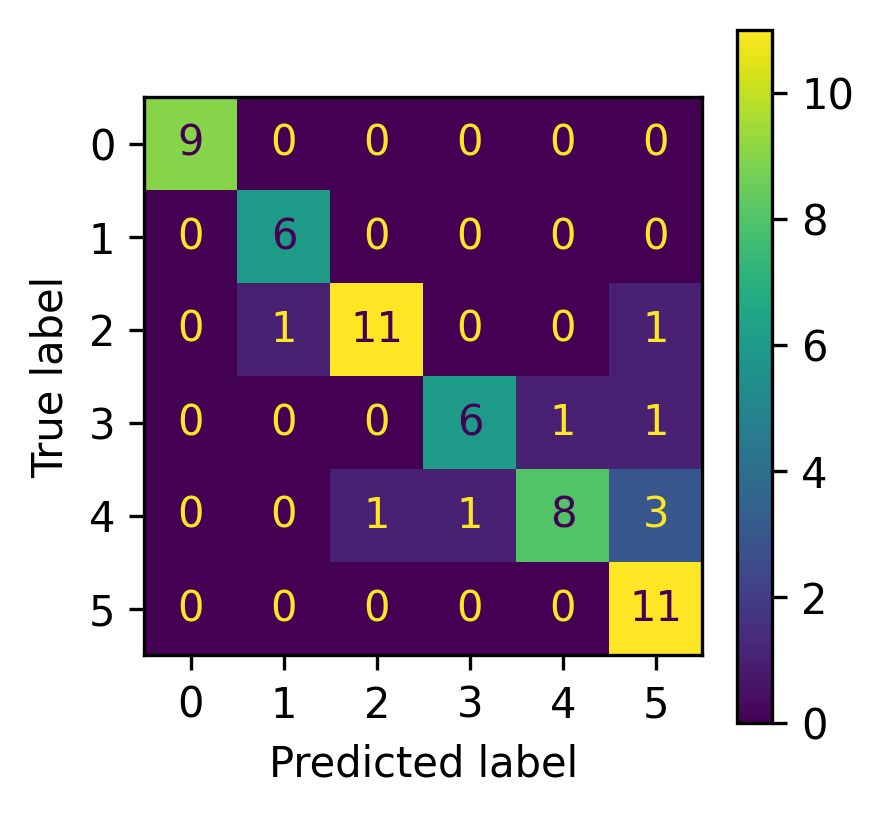

In [ ]:
# ploting confusion matrix
print('Validation Set Confusion Matrix\n')
fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
val_cmd = ConfusionMatrixDisplay(confusion_matrix(y_val, tf.argmax(pred2_val, axis=1).numpy()), display_labels=classes_train)
val_cmd.plot(ax=ax);

In [ ]:
val_cmd.figure_.savefig('val_cmd.png')

#### Comments on `model2` Evaluation on Validation set
Based on the metrics we've calculated and confusion matrix, here are some observations:

 - **Accuracy**: Your model's accuracy is **85.00%**, which is generally considered good in many contexts. However, the suitability of this accuracy depends on the specific problem domain and the difficulty level of your classification task.

 - **Loss**: The loss value is **48.97%**. This seems a bit high. You might want to look into ways to reduce this, perhaps by adjusting your model's architecture or tuning hyperparameters.

  - **Categorical Accuracy**: The categorical accuracy is **1.0** or **100%**. This is an excellent score, indicating that your model is performing extremely well on the validation set.

 - **Precision and Recall**: Both precision and recall are **85.00%**, which is quite good. It means that your model is reliable in its predictions and is able to retrieve the majority of relevant instances.

 - **F1 Scores**: The F1 scores for the individual classes range from **72.73%** to **100.00%**. These are generally high scores, indicating good harmonic mean of precision and recall for each class. However, the F1 score for class 5 is relatively low compared to others. You might want to investigate why this particular class is underperforming.

 - **AUC-ROC score**: Our model’s AUC-ROC score on the validation set is **91.00%**, which is quite high. This suggests that our model has a strong ability to distinguish between the different classes in your multi-class classification problem. It’s a good sign that our model is performing well in terms of distinguishing between different classes.

 - **Confusion Matrix**: Based on the confusion matrix, here are some insights into our model’s performance:

  - *Correct Predictions*: The diagonal elements of the confusion matrix represent correct predictions. The counts on the diagonal for each class seem to be relatively high, which is a good sign. It indicates that your model is correctly predicting a substantial number of instances for each class.
  - *Misclassifications*: The off-diagonal elements represent misclassifications. For instance, class 2 has been misclassified as class 1 once and class 4 is missclassified as class 2 once, as class 3 once & as class 5 3 times. These are areas where your model is making mistakes. You might want to look into why these particular misclassifications are happening. It could be due to certain features that these classes share, causing the model to confuse them.
  - *Class-wise Performance*: Class 2 seems to have the highest number of correct predictions (11) followed by class 5 with 11 correct predictions, while class 1 and class 3 the lowest (6). This could indicate that your model is better at recognizing patterns for class 2 & 5 and struggles with class 1 and class 3. You might want to investigate this further.

### Test Set
Now it time for final test set...

#### Predicting on Test set

In [ ]:
# Predicting on test set
pred2_test = model2.predict(X_test, batch_size=1)

60/60 [==============================] - 0s 2ms/step


#### Evaluating `model2` on Test set

In [ ]:
# Evaluating on test set
for key, value in model2.evaluate(X_test, y_test, batch_size=1, return_dict=True).items():
  print(f"Test set {key}: {value*100:.2f}%")

60/60 [==============================] - 0s 3ms/step - loss: 0.3283 - accuracy: 0.8833
Test set loss: 32.83%
Test set accuracy: 88.33%


In [ ]:
print(f"Test set Categorical Accuracy: {tf.keras.metrics.categorical_accuracy(y_test, tf.argmax(pred2_test, axis=1).numpy()).numpy()}")

Test set Categorical Accuracy: 1.0


In [ ]:
# Calculating precision
test_precision = tf.keras.metrics.Precision()
print(f"Test set Precision: {(test_precision(tf.one_hot(y_test, depth=6), tf.one_hot(tf.argmax(tf.nn.softmax(pred2_test), axis=1).numpy(), depth=6)).numpy()*100):.2f}%")

Test set Precision: 88.33%


In [ ]:
# Calculating recall
test_recall = tf.keras.metrics.Recall()
print(f"Test set Recall: {(test_recall(tf.one_hot(y_test, depth=6), tf.one_hot(tf.argmax(tf.nn.softmax(pred2_test), axis=1).numpy(), depth=6)).numpy()*100):.2f}%")

Test set Recall: 88.33%


In [ ]:
# Calculating f1 score
test_f1_score = tf.keras.metrics.F1Score()
test_scores = test_f1_score(tf.one_hot(y_test, depth=6), tf.one_hot(tf.argmax(tf.nn.softmax(pred2_test), axis=1).numpy(), depth=6)).numpy()

print("Test set F1Scores:")
for i, j in enumerate(test_scores):
  print(f"\tHand Sign {i} score: {(j*100):.2f}%")

Test set F1Scores:
	Hand Sign 0 score: 100.00%
	Hand Sign 1 score: 96.55%
	Hand Sign 2 score: 71.43%
	Hand Sign 3 score: 80.00%
	Hand Sign 4 score: 87.50%
	Hand Sign 5 score: 84.21%


In [ ]:
# Calculating AUC-ROC
test_auc = tf.keras.metrics.AUC()
test_auc.update_state(tf.one_hot(y_test, depth=6), tf.one_hot(tf.argmax(tf.nn.softmax(pred2_test), axis=1).numpy(), depth=6))
print(f"Test set AUC-ROC score: {(test_auc.result().numpy()*100):.2f}%")

Test set AUC-ROC score: 93.00%


In [ ]:
# Classification Report
print(f"Test set Classification Report:\n\n{classification_report(tf.one_hot(y_test, depth=6), tf.one_hot(tf.argmax(tf.nn.softmax(pred2_test), axis=1).numpy(), depth=6), target_names=target_names)}")

Test set Classification Report:

              precision    recall  f1-score   support

 hand sign 0       1.00      1.00      1.00        11
 hand sign 1       0.93      1.00      0.97        14
 hand sign 2       0.71      0.71      0.71         7
 hand sign 3       1.00      0.67      0.80        12
 hand sign 4       0.78      1.00      0.88         7
 hand sign 5       0.80      0.89      0.84         9

   micro avg       0.88      0.88      0.88        60
   macro avg       0.87      0.88      0.87        60
weighted avg       0.90      0.88      0.88        60
 samples avg       0.88      0.88      0.88        60



Test Set Confusion Matrix



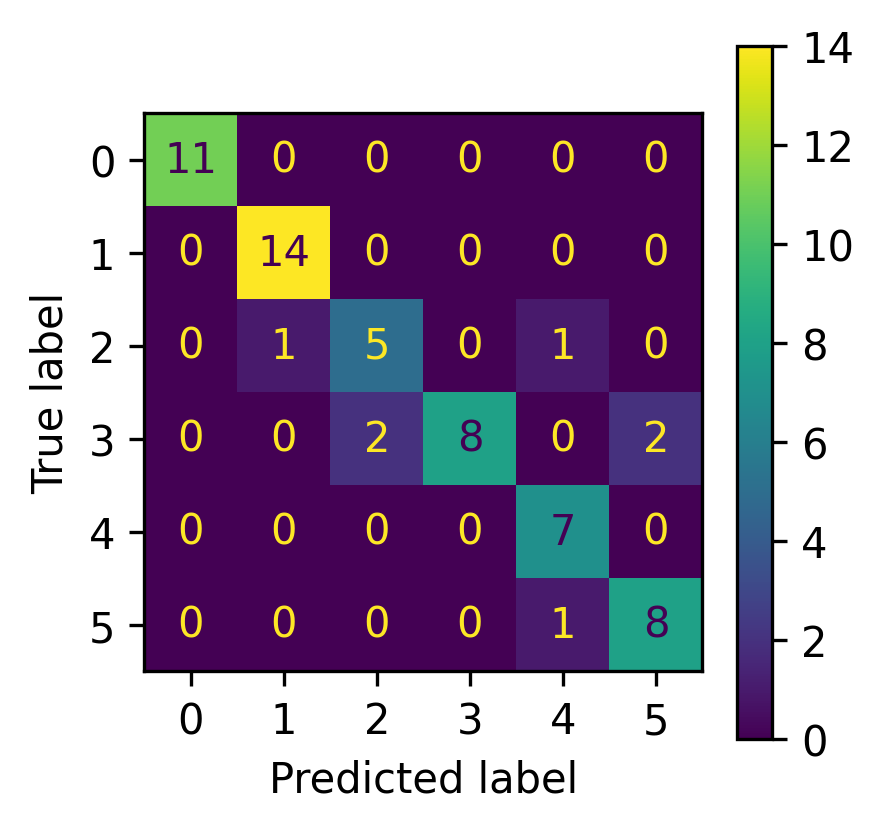

In [ ]:
# ploting confusion matrix
print('Test Set Confusion Matrix\n')
fig, ax = plt.subplots(figsize=(3, 3), dpi=300)
test_cmd = ConfusionMatrixDisplay(confusion_matrix(y_test, tf.argmax(pred2_test, axis=1).numpy()), display_labels=classes_train)
test_cmd.plot(ax=ax);

In [ ]:
test_cmd.figure_.savefig('test_cmd.png')

#### Comments on `model2` Evaluation on Test set

Based on the metrics we've calculated, here are some observations:

 - **Accuracy**: Our model's accuracy on the test set is **88.33%**, which is generally considered good in many contexts. However, the suitability of this accuracy depends on the specific problem domain and the difficulty level of your classification task.

 - **Loss**: The loss value is **32.83%**. This seems a bit high. You might want to look into ways to reduce this, perhaps by adjusting your model's architecture or tuning hyperparameters.

 - **Categorical Accuracy**: The categorical accuracy is **1.0** or **100%**. This is an excellent score, indicating that your model is performing extremely well on the test set.

 - **Precision and Recall**: Both precision and recall are **88.33%**, which is quite good. It means that your model is reliable in its predictions and is able to retrieve the majority of relevant instances.

 - **F1 Scores**: The F1 scores for the individual classes range from **71.43%** to **100.00%**. These are generally high scores, indicating good harmonic mean of precision and recall for each class. However, the F1 score for Hand Sign 4 is relatively low compared to others. You might want to investigate why this particular class is underperforming.

 - **AUC-ROC Score**: The AUC-ROC score on the test set is **93.00%**, which is quite high. This suggests that your model has a strong ability to distinguish between the different classes in your multi-class classification problem. It's a good sign that your model is performing well in terms of distinguishing between positive and negative classes.

 - **Confusion Matrix**: Based on the description of the confusion matrix image, here are some observations:

  - *Correct Predictions*: The diagonal elements of the confusion matrix represent correct predictions. The counts on the diagonal for each class seem to be relatively high, which is a good sign. It indicates that your model is correctly predicting a substantial number of instances for each class.
  - *Misclassifications*: The off-diagonal elements represent misclassifications. For instance, there are misclassifications evident in classes 2, 3 and 5. These are areas where your model is making mistakes. You might want to look into why these particular misclassifications are happening. It could be due to certain features that these classes share, causing the model to confuse them.
  - *Class-wise Performance*: The model has a good performance in classifying objects into classes 0, 1, 3 and 5 with high true positive rates. However, it struggles more with classes 2 and 4. You might want to investigate this further.

## Testing `model2` on New data
Let's test our model on some images...

First create helper functions to preprocess our images for fitting on our `model2`...

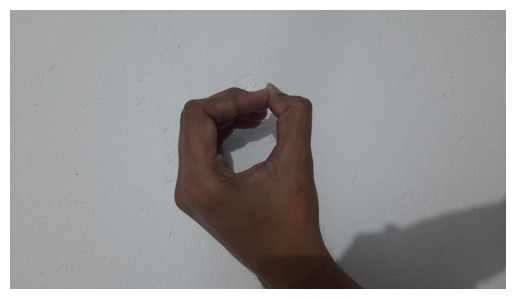

In [ ]:
img = mpimg.imread('/content/ML_Projects-main/Hand_Signs_Classification/assets/20240426_224156.jpg')
plt.imshow(img)
plt.axis(False);

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=64):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);
  plt.savefig("result.png", dpi=250)

1/1 [==============================] - 0s 23ms/step


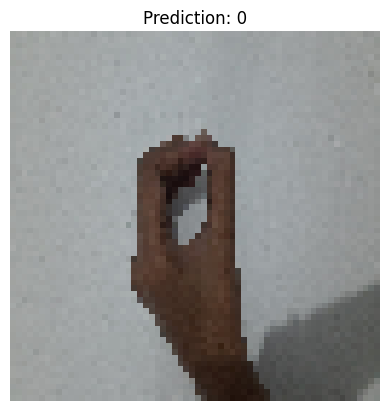

In [ ]:
# predicting with pred_and_plot function
pred_and_plot(model2, '/content/ML_Projects-main/Hand_Signs_Classification/assets/20240426_224156.jpg', classes_train)

1/1 [==============================] - 0s 20ms/step


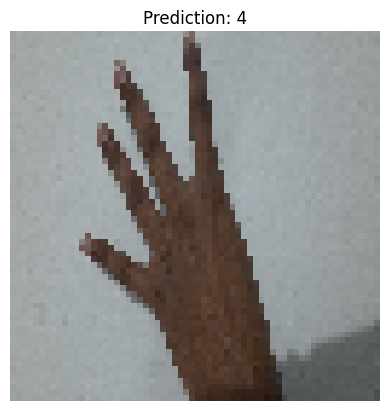

In [ ]:
pred_and_plot(model2, '/content/ML_Projects-main/Hand_Signs_Classification/assets/20240426_224223.jpg', classes_train)

1/1 [==============================] - 0s 86ms/step


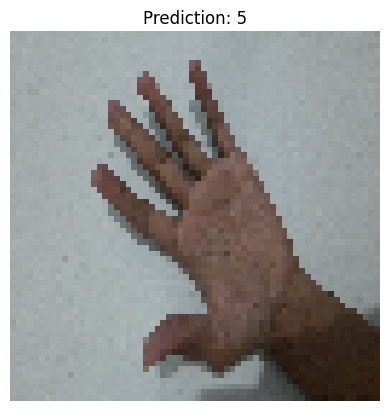

In [ ]:
pred_and_plot(model2, '/content/ML_Projects-main/Hand_Signs_Classification/assets/20240426_224210.jpg', classes_train)

1/1 [==============================] - 0s 90ms/step


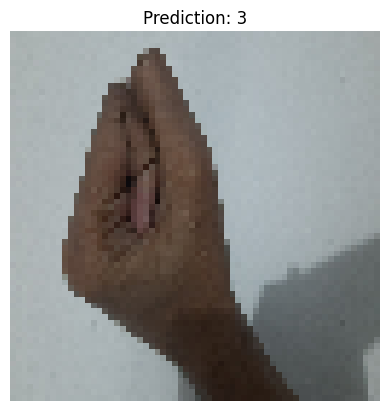

In [ ]:
pred_and_plot(model2, '/content/ML_Projects-main/Hand_Signs_Classification/assets/20240426_224134.jpg', classes_train)

So the model correctly predicted the given image as 0, 4 and 5, but missed on 2.


## Saving `model2`

In [ ]:
model2.save('hand_signs_model1')

In [ ]:
!zip -r hand_signs.zip hand_signs_model1/

  adding: hand_signs_model1/ (stored 0%)
  adding: hand_signs_model1/assets/ (stored 0%)
  adding: hand_signs_model1/variables/ (stored 0%)
  adding: hand_signs_model1/variables/variables.data-00000-of-00001 (deflated 13%)
  adding: hand_signs_model1/variables/variables.index (deflated 60%)
  adding: hand_signs_model1/saved_model.pb (deflated 86%)
  adding: hand_signs_model1/fingerprint.pb (stored 0%)
  adding: hand_signs_model1/keras_metadata.pb (deflated 89%)
